### 3.Pandas - kluczowy pakiet do danych tabelarycznych
- Wczytywanie danych tabelarycznych (CSV, TSV, XLS)
- Operacje na kolumnach i wierszach
- Filtrowanie i procesowanie danych
- Odczytywanie danych statystycznych
- Modyfikacja danych z użyciem funkcji pythonowych
- Agregacja, podobieństwa do SQL
- Pandas Profiling - raporty

Pandas to popularna biblioteka programistyczna w języku Python, która jest używana do manipulacji i analizy danych. Jest to potężne narzędzie, które ułatwia wczytywanie, przekształcanie, eksplorację i analizę danych w formie tabelarycznej, takich jak arkusze kalkulacyjne lub bazy danych.

##### Główne cechy i funkcje biblioteki Pandas:

1. Struktury danych: Pandas wprowadza dwie główne struktury danych: Series i DataFrame.

- Series: To jednowymiarowa tablica danych, podobna do kolumny w arkuszu kalkulacyjnym lub kolumny w bazie danych. Series można traktować jako uporządkowany zestaw danych z indeksem.
source

def read_csv_via_requests(url, **kwargs):
    r = requests.get(url, verify=certifi.where())
    r.raise_for_status()
    return pd.read_csv(io.StringIO(r.text), **kwargs)

# Load datasets using certifi-verified requests (avoids CERTIFICATE_VERIFY_FAILED)
drinks = read_csv_via_requests('https://bit.ly/drinksbycountry')
movies = read_csv_via_requests('https://bit.ly/imdbratings')
orders = read_csv_via_requests('https://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
stocks = read_csv_via_requests('https://bit.ly/smallstocks', parse_dates=['Date'])
titanic = read_csv_via_requests('https://bit.ly/kaggletrain')
ufo = read_csv_via_requests('https://bit.ly/uforeports', parse_dates=['Time'])

# Quick checks (uncomment to display in notebook)
# drinks.head()
# movies.head()
# orders.head()
# stocks.head()
# titanic.head()
# ufo.head()

##### Strona internetowa
- https://pandas.pydata.org/

##### Dokumentacja
- https://pandas.pydata.org/pandas-docs/stable/

##### Polecana strona
- https://www.dataschool.io/easier-data-analysis-with-pandas/

In [10]:
# pip install pandas

import pandas as pd
pd.__version__
import numpy as np

### `pd.Series()` - Tablica jednowymiarowa zawierająca dane oraz ich indeksy
Series jest jednowymiarową tablicą z etykietowanym indeksem, która może przechowywać dowolny typ danych – liczby, tekst, wartości logiczne, daty itp. Jest to fundament, na którym buduje się bardziej złożone struktury danych w Pandas.

In [2]:
s = pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

In [3]:
s = pd.Series([1,2,3], index=['a','b','c'])
s

a    1
b    2
c    3
dtype: int64

In [8]:
print('Powiedz "Cześć"')
print("Powiedz 'Cześć'") # dygresja o cydzysłowach :)

Powiedz "Cześć"
Powiedz 'Cześć'


In [9]:
s = pd.Series(data=[True, False, True])
s

0     True
1    False
2     True
dtype: bool

In [12]:
s = pd.Series(np.arange(1,11), index=pd.date_range(start='20251118', periods=10))
s

2025-11-18     1
2025-11-19     2
2025-11-20     3
2025-11-21     4
2025-11-22     5
2025-11-23     6
2025-11-24     7
2025-11-25     8
2025-11-26     9
2025-11-27    10
Freq: D, dtype: int64

In [13]:
s.dtype

dtype('int64')

Atrybut z indeksami jest obiektem typu `pd.Index`:

In [14]:
s.index

DatetimeIndex(['2025-11-18', '2025-11-19', '2025-11-20', '2025-11-21',
               '2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25',
               '2025-11-26', '2025-11-27'],
              dtype='datetime64[ns]', freq='D')

In [15]:
s.values # będziemy często używać

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Series vs tablica NumPy

Series uogólnia jednowymiarową tablicę NumPy:
* tablica NumPy posiada wewnętrzną indeksację w stylu Pythona (*implicit index*);
* Series posiada wewnętrzną indeksację w stylu Pythona plus indeksację za pomocą etykiet.

In [21]:
s = pd.Series([3, 1, 2.71, -10], index=['a', 'b', 'c', 'd'])
s

a     3.00
b     1.00
c     2.71
d   -10.00
dtype: float64

In [24]:
s['c']

np.float64(2.71)

Indeks etykiet może:
* nie zachowywać kolejności,
* posiadać luki,
* posiadać powtórzenia.

In [25]:
s = pd.Series([3, 1, 2.71, -10, 50], index=[3, 2, 5, 2, 100])
s

3       3.00
2       1.00
5       2.71
2     -10.00
100    50.00
dtype: float64

In [26]:
s[2]

2     1.0
2   -10.0
dtype: float64

## Series jako rodzaj słownika

Klucze słownika przechodzą na etykiety podczas przekształcania słownika na obiekt Series:

In [27]:
ludność_dict = {'Polska': 38501,
                'Czechy': 10221,
                'Szwecja': 9045,
                'Niemcy': 82370,
                'Litwa': 3565}

ludność = pd.Series(ludność_dict)
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

In [28]:
ludność['Polska']

np.int64(38501)

In [29]:
ludność.Polska # jak pisać żeby używać tej notacji (z _)

np.int64(38501)

## Selekcja elementów z obiektu Series

Obiekt Series ma równocześnie cechy słownika i jednowymiarowej tablicy. 

Niektóre wzorce dostępu do elementów naśladują te ze słownika, inne te z tablicy jednowymiarowej.

In [30]:
ludność.keys()

Index(['Polska', 'Czechy', 'Szwecja', 'Niemcy', 'Litwa'], dtype='object')

In [31]:
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

In [32]:
ludność['Grecja'] = 10423
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Grecja     10423
dtype: int64

Series jako tablica jednowymiarowa pozwala na dostęp do wartości poprzez:
* wycinki,
* maskowanie,
* wymyślne indeksowanie.

In [33]:
# Wycinek indeksów z poziomu etykiet
ludność['Czechy':'Niemcy'] # Prawy kraniec zaliczony!

Czechy     10221
Szwecja     9045
Niemcy     82370
dtype: int64

In [34]:
# Wycinek wewnętrznych indeksów Pythona
ludność[1:3] # Prawie kraniec wykluczony!

Czechy     10221
Szwecja     9045
dtype: int64

In [38]:
ludność[(ludność < 10000) & (ludność > 5000)] # dwa warunki

Szwecja    9045
dtype: int64

In [43]:
# Indeksowanie wymyślne (fancy indexing), indeks etykiet
ludność[['Polska', 'Grecja']]

Polska    38501
Grecja    10423
dtype: int64

In [45]:
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Grecja     10423
dtype: int64

In [46]:
ludność.iloc[[0, 2, 4]]

Polska     38501
Szwecja     9045
Litwa       3565
dtype: int64

## Zagadka

In [47]:
s = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
s

1    a
2    b
3    c
dtype: object

Jaka wartość kryje się pod `s[2]`? Co zwróci `s[1:3]`?

In [48]:
s[2] # z poziomu nazw etykiet

'b'

In [49]:
s[1:3] # wycinek po indexach wewnętrzych 

2    b
3    c
dtype: object

## Indeksery `loc`, `iloc`

* Atrybut `loc` zawsze odnosi się do indeksów z poziomu etykiet.
* Atrybut `iloc` zawsze odnosi się do indeksów wewnętrznych Pythona, czyli do zwykłej numeracji całkowitoliczbowej od zera w górę.

In [50]:
s.iloc[1:3]

2    b
3    c
dtype: object

In [53]:
s

1    a
2    b
3    c
dtype: object

In [51]:
s.iloc[0] # indeks wewnętrzny Pythona

'a'

In [52]:
s.loc[1] # indeks etykiet

'a'

In [57]:
#Statystyki

In [58]:
ceny_akcji = pd.Series(data={'Orlen': 70, 'PZU': 30, 'KGHM': 100})
ceny_akcji

Orlen     70
PZU       30
KGHM     100
dtype: int64

In [59]:
ceny_akcji.count()

np.int64(3)

In [60]:
ceny_akcji.value_counts()

70     1
30     1
100    1
Name: count, dtype: int64

In [61]:
ceny_akcji.mean()

np.float64(66.66666666666667)

In [62]:
ceny_akcji.sum()

np.int64(200)

In [63]:
ceny_akcji.min()

np.int64(30)

In [64]:
np.min(ceny_akcji)

np.int64(30)

In [65]:
ceny_akcji.describe()

count      3.000000
mean      66.666667
std       35.118846
min       30.000000
25%       50.000000
50%       70.000000
75%       85.000000
max      100.000000
dtype: float64

In [67]:
ceny_akcji

Orlen     70
PZU       30
KGHM     100
dtype: int64

In [66]:
ceny_akcji.nlargest(2)

KGHM     100
Orlen     70
dtype: int64

In [68]:
ceny_akcji.nsmallest(2)

PZU      30
Orlen    70
dtype: int64

In [69]:
ceny_akcji.rank()

Orlen    2.0
PZU      1.0
KGHM     3.0
dtype: float64

In [74]:
ceny_akcji.sort_values(ascending=False)

KGHM     100
Orlen     70
PZU       30
dtype: int64

## `pd.Series()`

Funkcja `pd.Series()` pozwala na tworzenie obiektów Series wg. schematu
```python
pd.Series(dane, index=index)
```
Parametr `index` jest opcjonalny, parametr `dane` może przyjmować rozmaitą postać.

In [75]:
pd.Series(ceny_akcji)

Orlen     70
PZU       30
KGHM     100
dtype: int64

### `pd.DataFrame()` - Dwuwymiarowa tabela, w której kolumnami są obiekty Series.
pd.DataFrame() jest jedną z najbardziej wszechstronnych i podstawowych struktur danych oferowanych przez bibliotekę Pandas. DataFrame to dwuwymiarowa tablica danych, która może przechowywać dane o różnych typach (liczby, tekst, wartości logiczne, daty itp.) w kolumnach. Struktura ta jest podobna do arkusza kalkulacyjnego lub tabeli relacyjnej bazy danych, co czyni ją niezwykle użyteczną do analizy danych.

**W analizie danych DataFrame jest często przedstawiana jako tabela, w której kolumny to zmienne a wiersze to obserwacje.**

In [101]:
ludność_dict = {'Czechy': 10221,
                'Szwecja': 9045,
                'Litwa': 3565,
                'Polska': 38501,}

ludność = pd.Series(ludność_dict)
ludność

Czechy     10221
Szwecja     9045
Litwa       3565
Polska     38501
dtype: int64

In [102]:
powierzchnia_dict = {'Polska': 322.6,
                     'Czechy': 78.9,
                     'Szwecja': 450,
                     'Niemcy': 357,
                     'Litwa': 65.3}

powierzchnia = pd.Series(powierzchnia_dict)
powierzchnia

Polska     322.6
Czechy      78.9
Szwecja    450.0
Niemcy     357.0
Litwa       65.3
dtype: float64

In [103]:
kraje = pd.DataFrame({'powierzchnia': powierzchnia, 'ludność': ludność})
kraje

,powierzchnia,ludność
Czechy,78.9,10221.0
Litwa,65.3,3565.0
Niemcy,357.0,NaN
Polska,322.6,38501.0
Szwecja,450.0,9045.0


## DataFrame uogólnia tablicę 2D NumPy

Podobnie jak Series obiekty DataFrame posiadają dwa poziomy indeksów dla wierszy: 
* wewnętrzny z numeracją liczbami całkowitymi od zera,
* zbudowany z etykiet.

In [84]:
kraje.index

Index(['Polska', 'Czechy', 'Szwecja', 'Niemcy', 'Litwa'], dtype='object')

In [86]:
kraje.columns

Index(['powierzchnia', 'ludność'], dtype='object')

In [87]:
kraje['ludność']

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Name: ludność, dtype: int64

In [91]:
kraje.loc['Polska']

powierzchnia      322.6
ludność         38501.0
Name: Polska, dtype: float64

## Sposoby konstrukcji obiektów DataFrame

Z obiektu Series:

In [92]:
pd.DataFrame(ludność, columns=['ludność'])

,ludność
Polska,38501
Czechy,10221
Szwecja,9045
Niemcy,82370
Litwa,3565


In [93]:
list_dict = [{'a': 1, 'b': 2, 'c': 100},
             {'b': 10, 'c': 'Ala'},
             {'a': 0, 'b': 0, 'c': 1, 'd': 2}]
pd.DataFrame(list_dict)

,a,b,c,d
0,1.0,2,100,NaN
1,NaN,10,Ala,NaN
2,0.0,0,1,2.0


In [94]:
pd.DataFrame({'ludność': ludność,
              'powierzchnia': powierzchnia})

,ludność,powierzchnia
Polska,38501,322.6
Czechy,10221,78.9
Szwecja,9045,450.0
Niemcy,82370,357.0
Litwa,3565,65.3


In [95]:
import numpy as np
arr = np.arange(10).reshape(5, 2)
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [96]:
pd.DataFrame(arr, index=['a', 'b', 'c', 'd', 'e'],
             columns=['X', 'Y'])

,X,Y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [97]:
kraje

,powierzchnia,ludność
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


In [105]:
kraje.index

Index(['Czechy', 'Litwa', 'Niemcy', 'Polska', 'Szwecja'], dtype='object')

## Index

Cechy obiektu typu Index:
* niezmienny (*immutable*),
* uporządkowany,
* może zawierać powtórzenia.

In [104]:
ind = pd.Index([2, 4, 6, 4, 4, 10, 25])
ind

Index([2, 4, 6, 4, 4, 10, 25], dtype='int64')

In [107]:
ind[0]

np.int64(2)

In [108]:
ind[-1]

np.int64(25)

In [112]:
ind[::2]

Index([2, 6, 4, 25], dtype='int64')

In [114]:
ind[0:5:2]

Index([2, 6, 4], dtype='int64')

In [115]:
ind.ndim, ind.shape, ind.size, ind.dtype

(1, (7,), 7, dtype('int64'))

In [119]:
kraje.reset_index(inplace=True)

In [121]:
kraje.set_index('index', inplace=True)
kraje

,powierzchnia,ludność
index,,
Czechy,78.9,10221.0
Litwa,65.3,3565.0
Niemcy,357.0,NaN
Polska,322.6,38501.0
Szwecja,450.0,9045.0


In [123]:
kraje['Gęstość zaludnienia'] = kraje['ludność'] / kraje['powierzchnia']

In [126]:
kraje

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Czechy,78.9,10221.0,129.543726
Litwa,65.3,3565.0,54.594181
Niemcy,357.0,NaN,NaN
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


In [127]:
# Maskowanie
kraje[(kraje.powierzchnia > 100) & (kraje['Gęstość zaludnienia'] < 200)]

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


In [131]:
kraje['Gęstość zaludnienia']

index
Czechy     129.543726
Litwa       54.594181
Niemcy            NaN
Polska     119.345939
Szwecja     20.100000
Name: Gęstość zaludnienia, dtype: float64

In [132]:
kraje

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Czechy,78.9,10221.0,129.543726
Litwa,65.3,3565.0,54.594181
Niemcy,357.0,NaN,NaN
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


In [133]:
kraje.describe()

,powierzchnia,ludność,Gęstość zaludnienia
count,5.000000,4.00000,4.000000
mean,254.760000,15333.00000,80.895962
std,173.202029,15715.31669,52.386189
min,65.300000,3565.00000,20.100000
25%,78.900000,7675.00000,45.970636
50%,322.600000,9633.00000,86.970060
75%,357.000000,17291.00000,121.895386
max,450.000000,38501.00000,129.543726


In [135]:
kraje.isna().sum()

powierzchnia           0
ludność                1
Gęstość zaludnienia    1
dtype: int64

In [136]:
kraje.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Czechy to Szwecja
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   powierzchnia         5 non-null      float64
 1   ludność              4 non-null      float64
 2   Gęstość zaludnienia  4 non-null      float64
dtypes: float64(3)
memory usage: 332.0+ bytes


In [140]:
kraje = kraje.reset_index() # resetuje index

In [145]:
kraje = kraje.set_index('index')

In [147]:
kraje

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Czechy,78.9,10221.0,129.543726
Litwa,65.3,3565.0,54.594181
Niemcy,357.0,NaN,NaN
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


<Axes: xlabel='index'>

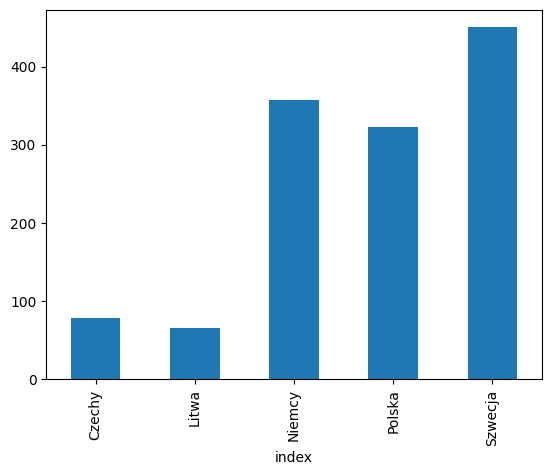

In [152]:
kraje['powierzchnia'].plot(kind='bar')

In [153]:
from matplotlib import pyplot as plt

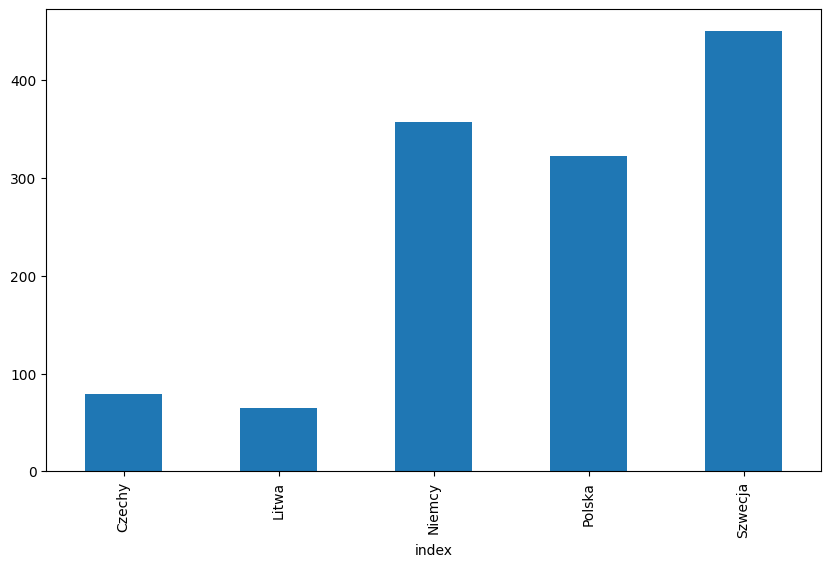

In [155]:
kraje['powierzchnia'].plot(kind='bar', figsize=(10,6))
plt.savefig('wykres.png')

In [157]:
### Braki danych

In [158]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [161]:
df.drop(2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [174]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [162]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [163]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [164]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [175]:
df.fillna('BRAK')

,A,B,C
0,1.0,5.0,1
1,2.0,BRAK,2
2,BRAK,BRAK,3


In [180]:
df['A'].fillna(df['A'].mean(), inplace=True) #wstawiamy medianę wartości kolumny A w miejsca NaN

In [181]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


### Grupowanie (group by)

In [182]:
# Tworzymy ramkę danych
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [185]:
df = pd.DataFrame(data,columns=['Company','Person','Sales'])
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [189]:
df.dtypes

Company    object
Person     object
Sales       int64
dtype: object

In [195]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [202]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [201]:
df.describe(include='object')

,Company,Person
count,6,6
unique,3,6
top,GOOG,Sam
freq,2,1


### Daty - pd.Timestamp()
https://docs.python.org/3/library/datetime.html

In [210]:
data = pd.Timestamp.today()
data

Timestamp('2025-11-18 13:17:30.962448')

In [212]:
data.year

2025

In [213]:
data.month

11

In [221]:
data_dzis = data.strftime(format='%Y%m%d')

In [217]:
'2024-06-11'

'2024-06-11'

In [219]:
pd.Timestamp('2024-06-11').year

2024

In [222]:
df.groupby('Company').describe().to_excel(f'statystyki_{data_dzis}.xlsx')

## Łączenie danych
- https://pandas.pydata.org/docs/user_guide/merging.html

In [223]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [227]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [228]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})   

In [229]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [230]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [231]:
# Łączenie po kluczu
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [233]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [234]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [235]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [236]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [237]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [238]:
### Wczytywanie danych

In [242]:
df = pd.read_excel('data.xlsx', header=None)
df.columns = ['DATA', 'TIMESTAMP', 'WYNIK']
df

,DATA,TIMESTAMP,WYNIK
0,2024-05-21,00:00:00,123.4
1,2024-05-21,00:15:00,154.3
2,2024-05-21,00:30:00,189.5


In [245]:
df = pd.read_csv('data.csv', header=None)
df

,0,1,2
0,2024-05-21,00:00:00,123.4
1,2024-05-21,00:01:00,123.5
2,2024-05-21,00:02:00,123.6


In [250]:
df = pd.read_table('data.txt', header=None, delimiter=',')
df

,0,1
0,2024-05-21 12:00:00,2.3
1,2024-05-21 12:01:00,3.1
2,2024-05-21 12:02:00,2.7


In [267]:
df[0]

0    2024-05-21 12:00:00
1    2024-05-21 12:01:00
2    2024-05-21 12:02:00
Name: 0, dtype: object

In [270]:
pd.to_datetime(df[0]).dt.date

0    2024-05-21
1    2024-05-21
2    2024-05-21
Name: 0, dtype: object

## Zbiory danych

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [285]:
# DLA WERSJI DESKTOP (MAC OS)

# Bezpieczne pobieranie CSV z weryfikacją certyfikatów (macOS, używa certifi z .venv)
import os, io, requests, certifi, pandas as pd

# Ustawienie SSL_CERT_FILE dla bieżącej sesji (przydatne w Jupyter/VS Code)
os.environ['SSL_CERT_FILE'] = certifi.where()

def read_csv_via_requests(url, **kwargs):
    r = requests.get(url, verify=certifi.where())
    r.raise_for_status()
    return pd.read_csv(io.StringIO(r.text), **kwargs)

# Ładowanie datasetów przez HTTPS z certifi
drinks = read_csv_via_requests('https://bit.ly/drinksbycountry')
movies = read_csv_via_requests('https://bit.ly/imdbratings')
orders = read_csv_via_requests('https://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '', regex=False).astype(float)
stocks = read_csv_via_requests('https://bit.ly/smallstocks', parse_dates=['Date'])
titanic = read_csv_via_requests('https://bit.ly/kaggletrain')
ufo = read_csv_via_requests('https://bit.ly/uforeports', parse_dates=['Time'])
# ...existing code...

In [284]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
